# Business Problem Statement: 

**Your company is expanding into new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.**

**Task:** You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.

**Questions:**
1. What types of flights have the highest average fatalities?
2. What effect on safety do engines have and how much is this effected by weather?
3. Which make and models have the lowest risk for commercial ventures?


# Importing Libraries

In [56]:
!pip install plottable -q

In [57]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mannwhitneyu
from scipy.stats import norm
from scipy.stats import ks_2samp, kruskal
import cartopy.crs as ccrs
import cartopy.feature as cf
from plottable import Table

# Reading the data

In [58]:
df = pd.read_csv('/kaggle/input/aviation-accident-database-synopses/AviationData.csv', encoding='mac_roman')
df.head()

<ipython-input-58-e97986e5fddd>:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/kaggle/input/aviation-accident-database-synopses/AviationData.csv', encoding='mac_roman')
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).an

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [59]:
# Renaming columns for reducing later hasslement

col_list = list(df.columns)
col_list = [col.replace(".", "_") for col in col_list]
df.columns = col_list
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Purpose_of_flight,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [60]:
#checking the dataset length and dimension

df.shape

(88889, 31)

# Data type and count of each column

Observation: There are a lot of missing values since the counts are less than the other column lengths


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event_Id                88889 non-null  object 
 1   Investigation_Type      88889 non-null  object 
 2   Accident_Number         88889 non-null  object 
 3   Event_Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport_Code            50132 non-null  object 
 9   Airport_Name            52704 non-null  object 
 10  Injury_Severity         87889 non-null  object 
 11  Aircraft_damage         85695 non-null  object 
 12  Aircraft_Category       32287 non-null  object 
 13  Registration_Number     87507 non-null  object 
 14  Make                    88826 non-null

In [62]:
#Summing up all the missing values of all the columns

null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

Event_Id                      0
Investigation_Type            0
Accident_Number               0
Event_Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport_Code              38757
Airport_Name              36185
Injury_Severity            1000
Aircraft_damage            3194
Aircraft_Category         56602
Registration_Number        1382
Make                         63
Model                        92
Amateur_Built               102
Number_of_Engines          6084
Engine_Type                7096
FAR_Description           56866
Schedule                  76307
Purpose_of_flight          6192
Air_carrier               72241
Total_Fatal_Injuries      11401
Total_Serious_Injuries    12510
Total_Minor_Injuries      11933
Total_Uninjured            5912
Weather_Condition          4492
Broad_phase_of_flight     27165
Report_Status              6384
Publication_Date          13771
dtype: i

Text(0.5, 1.0, 'Variables with missing values')

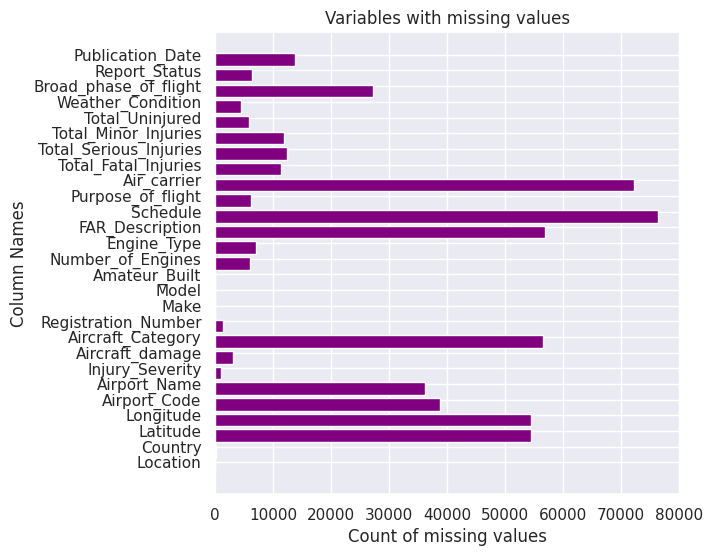

In [63]:
# Visualizing the null entries

labels = []
values = []
for col in null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

**Note: They mentioned "It is up to you to decide what data to use, how to deal with missing values, how to aggregate the data, and how to visualize it in an interactive dashboard." so moving accordingly**

# Exploratory Data Analysis

A quick summary of data set 

In [64]:
# How many countries do we have?
print(f"Total number unique countries: {len(df.Country.unique())}")
print()

# print(f"""Unqiue number of countries: \n {df["Country"].value_counts()}""")
# print()

# Note: Counts show null included

print(f"Total number locations: {len(df.Location.unique())}")
print()

# print(f"""Locationwise crash count: \n {df["Location"].value_counts()}""")
# print()

# How many unique number of injuries do we have?
print(f"Total unique types of injury severity: {len(df.Injury_Severity.unique())}")
print()

# print(f"""Type wise injury severity count: \n {df["Injury_Severity"].value_counts()}""")
# print()

# How many unique weather conditions do we have?
print(f"Total unique types of weather conditions: {len(df.Weather_Condition.unique())}")
print()

# print(f"""Type wise weather condition count: \n {df["Weather_Condition"].value_counts()}""")
# print()

# How many unique types of engines do we have?
print(f"Total unique types of engine: {len(df.Engine_Type.unique())}")
print()

# print(f"""Type wise Engine type count: \n {df["Engine_Type"].value_counts()}""")
# print()

# How many unique types of phrase of flight do we have?
print(f"Total unique types of phrase of flight: {len(df.Broad_phase_of_flight.unique())}")
print()

#print(f"""Type wise broad phrase of flight type count: \n {df["Broad_phase_of_flight"].value_counts()}""")
#print()

Total number unique countries: 220

Total number locations: 27759

Total unique types of injury severity: 110

Total unique types of weather conditions: 5

Total unique types of engine: 13

Total unique types of phrase of flight: 13



In [65]:
#adding a year column

df['Event_Date'] = pd.to_datetime(df['Event_Date'])
df["Event_Year"] = df.loc[:,("Event_Date")].dt.year
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Event_Id,Investigation_Type,Accident_Number,Event_Date,Location,Country,Latitude,Longitude,Airport_Code,Airport_Name,...,Air_carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Broad_phase_of_flight,Report_Status,Publication_Date,Event_Year
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN,1948
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996,1962
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007,1974
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000,1977
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022,2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022,2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2022


In [66]:
#Capitalizing the first letter of the column data
df['Make'] = df['Make'].apply(lambda x: x.lower().capitalize() if type(x) == str else x)

In [67]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'Event_Year'],
      dtype='object')

In [68]:
def categorize_fatal(severity):
    if pd.notna(severity) and "Fatal" in severity:  # Check for NaN and 'Fatal' substring
        return "Fatal"
    else:
        return severity

df['Injury_Severity'] = df['Injury_Severity'].apply(categorize_fatal)
df['Injury_Severity'].fillna("Unavailable", inplace=True) #Filling all null to Unavailable
df['Injury_Severity'].unique()

<ipython-input-68-b8094838eb34>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Injury_Severity'].fillna("Unavailable", inplace=True) #Filling all null to Unavailable


array(['Fatal', 'Incident', 'Unavailable', 'Minor', 'Serious'],
      dtype=object)

## Visualizing Histograms and inferring information

**Observations:**

1. Injury Severity: Majority of aviation accidents resulted in fatalities and other categoies are much less common.

2. Aircraft Damage: Majority of the accidents caused substantial damage to aircraft and a smaller proportion resulted in the aircraft being destroyed and minor damage being rare.

3. Aircraft Category: "Airplanes" are the most dominating category when comes to being involved in accidents according to this dataset. Other aero-vehicles such as "Helicopters" and "Gliders" are less frequent making "Ultralight" and "Powered parachutes" are negligible in numbers.

4. Amateur-Built Aircraft: The majority of accidents involve non-amateur-built aircraft, with amateur-built cases being a smaller subset.

5. Number of Engines: Single-engine (1 engine) aircraft are more susceptible to accidents while multi-engine aircrafts (2/2+ engines) are less prone to accident.
* *Inference:* Engine numbers play a pivotal role in avoiding aircraft accident.

6. Engine Type: "Reciprocating" engine types are the most prone to accident while Turbojets, turboprops, and other engine types are less prone.
* *Inference:* Engine types also play a pivotal role in avoiding aircraft accident.

7. FAR (Federal Aviation Regulations) Description:
* Part 91: General Aviation accounts for the majority of accidents, reflecting private and small-scale aviation activity.
* Other categories like agricultural aviation (Part 137) and commercial aviation (Part 121) occur less frequently.

8. Purpose of Flight: "Personal flights" along with "Instructional flights" and "unknown purposes" are more susceptible to accidents while other purposes are less prone.

9. Weather Condition:
* Most accidents occur under VMC (Visual Meteorological Conditions), indicating clear weather.
* A smaller number of accidents happen under IMC (Instrument Meteorological Conditions), which involve poor visibility.

10. Broad Phase of Flight:
* Landing is the most accident-prone phase of flight, followed by takeoff and cruise.
* Climb and descent are less frequent, and go-around phases are rare.

These insights are helpful for understanding accident patterns, identifying risk factors, and implementing safety measures in aviation.

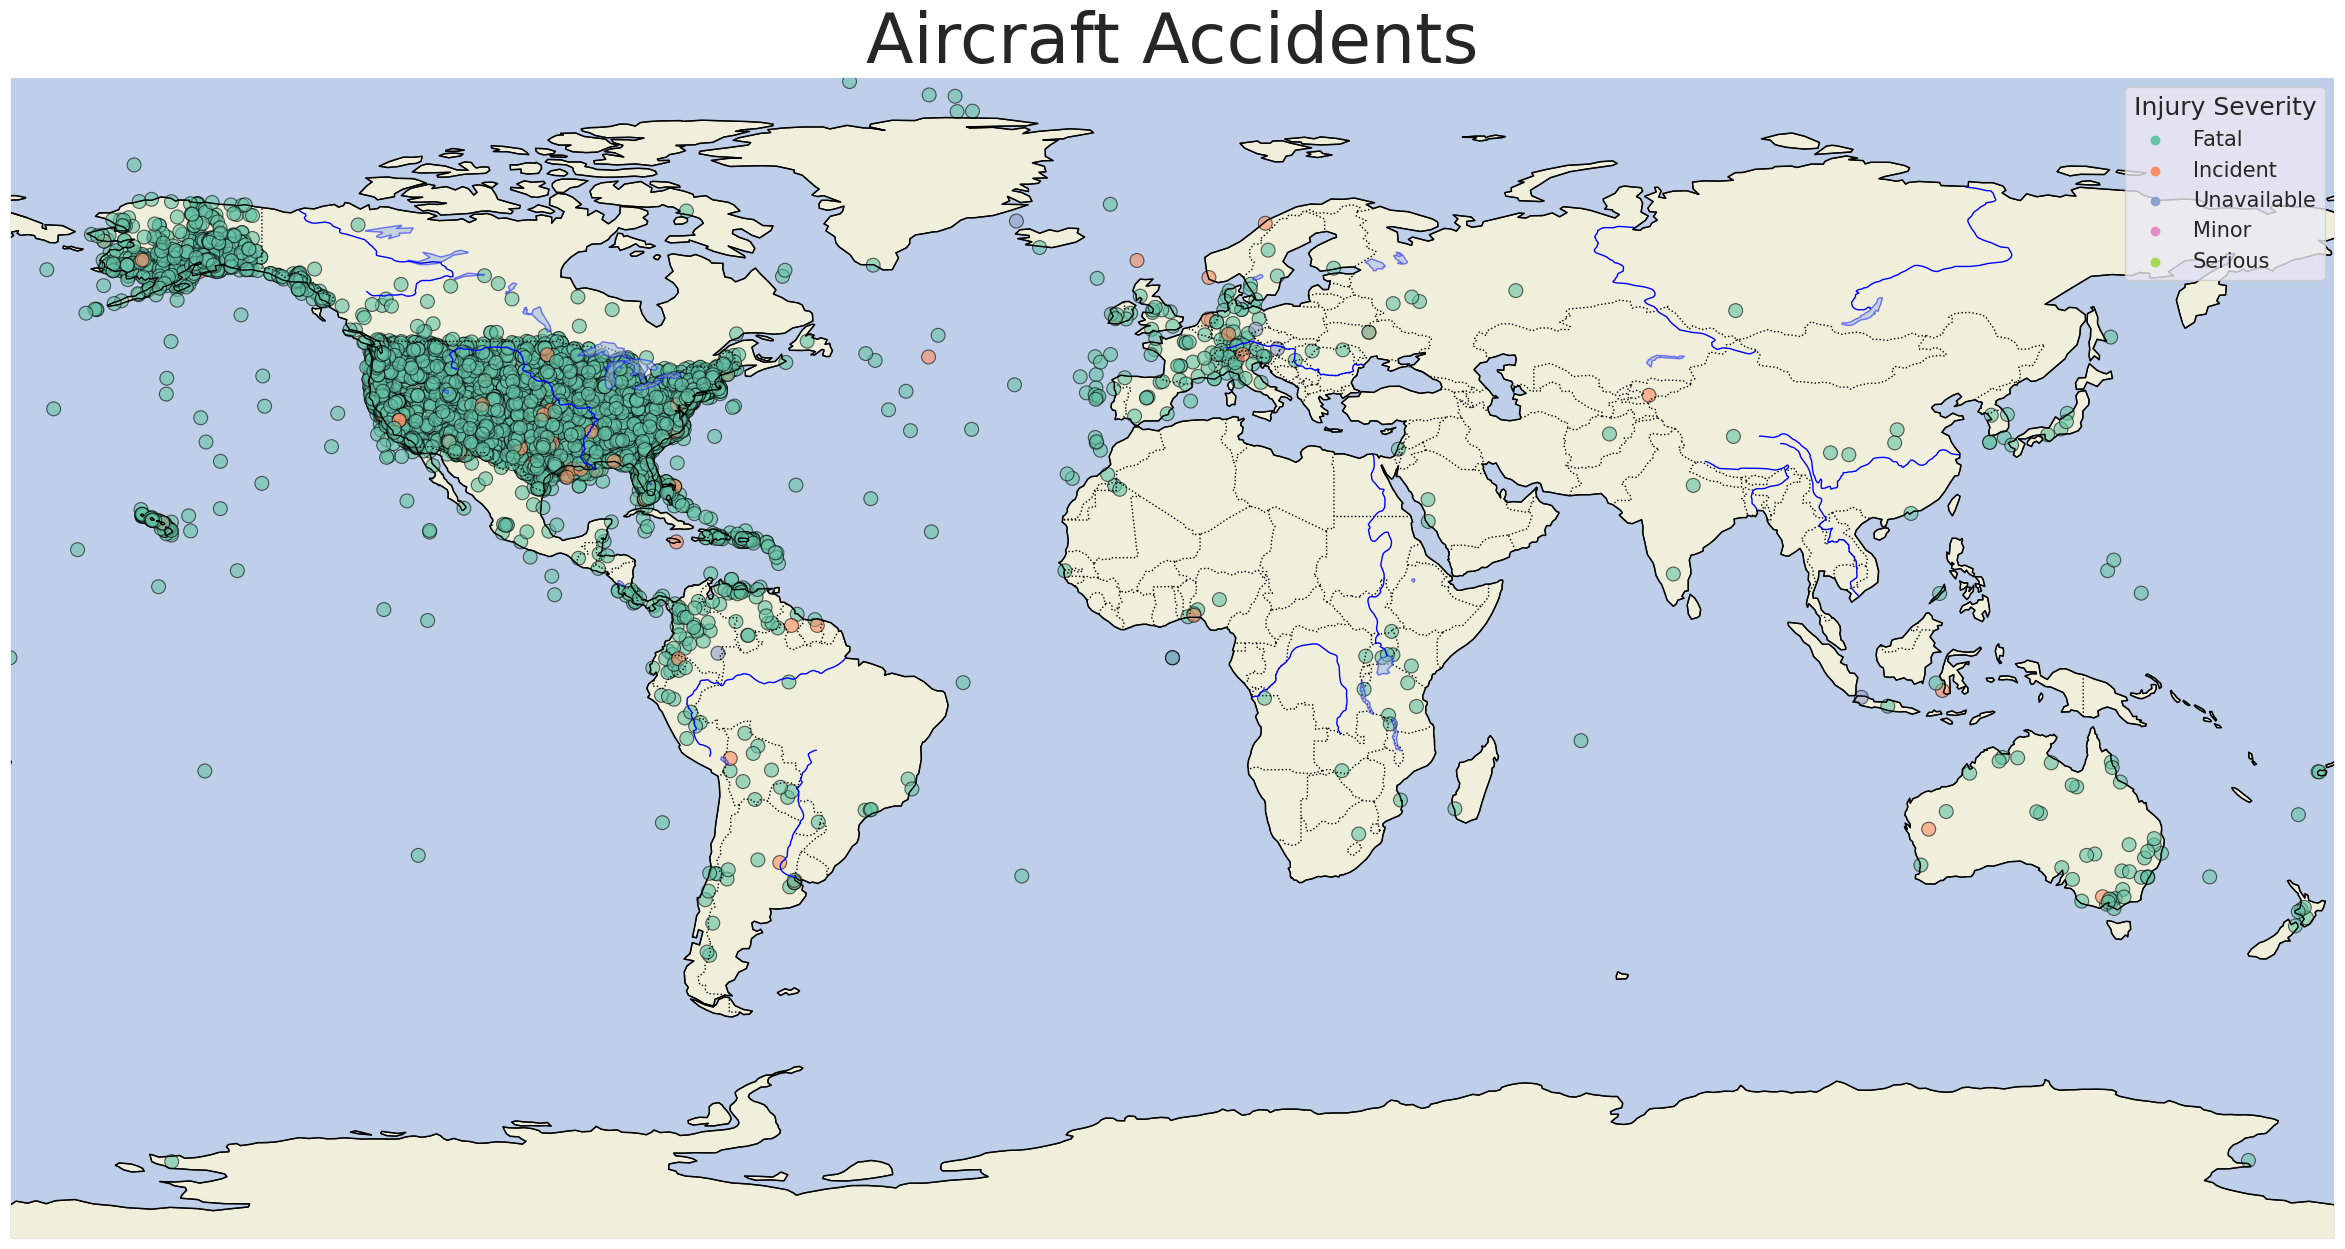

<Figure size 640x480 with 0 Axes>

In [69]:
def clean_coordinates(coord):
    if isinstance(coord, str):
        # Handle directional suffixes
        if 'W' in coord or 'S' in coord:
            return -float(coord[:-1])  # Negative for West or South
        elif 'E' in coord or 'N' in coord:
            return float(coord[:-1])  # Positive for East or North
        else:
            return float(coord)  # If no directional suffix, assume numeric
    return coord  # Return as is if already numeric


# Create a DataFrame of existing coordinates
coordinatesdf = df[['Latitude', 'Longitude', 'Injury_Severity']]
coordinatesdf = coordinatesdf.dropna(subset=['Longitude', 'Latitude'])

# Apply cleaning function to the coordinate columns
coordinatesdf['Longitude'] = coordinatesdf['Longitude'].apply(clean_coordinates)
coordinatesdf['Latitude'] = coordinatesdf['Latitude'].apply(clean_coordinates)

# Drop any remaining invalid rows
coordinatesdf = coordinatesdf.dropna(subset=['Longitude', 'Latitude'])
coordinatesdf = coordinatesdf[(coordinatesdf['Longitude'].apply(lambda x: isinstance(x, (int, float)))) &
                               (coordinatesdf['Latitude'].apply(lambda x: isinstance(x, (int, float))))]


# Plotting the map with a lat-long projection
fig = plt.figure(figsize=(30, 19))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.add_feature(cf.LAND, edgecolor='black')
ax.add_feature(cf.OCEAN, alpha=0.5)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.BORDERS, linestyle=':')
ax.add_feature(cf.LAKES, alpha=0.5, edgecolor='blue')
ax.add_feature(cf.RIVERS, edgecolor='blue')
ax.set_title("Aircraft Accidents", fontsize=50)

# Scatter plot of accidents with hue based on Injury Severity
sns.scatterplot(
    x='Longitude', 
    y='Latitude', 
    data=coordinatesdf,
    hue='Injury_Severity',
    alpha=0.6,
    palette='Set2',  # Adjust color palette for better distinction
    edgecolor='black',
    s=100,
    transform=ccrs.PlateCarree(),  # Correct projection for scatter points
    ax=ax
)

plt.legend(title='Injury Severity', fontsize=15, title_fontsize=18)
plt.show()
plt.savefig('air_accident_map.png', dpi=300, bbox_inches='tight')

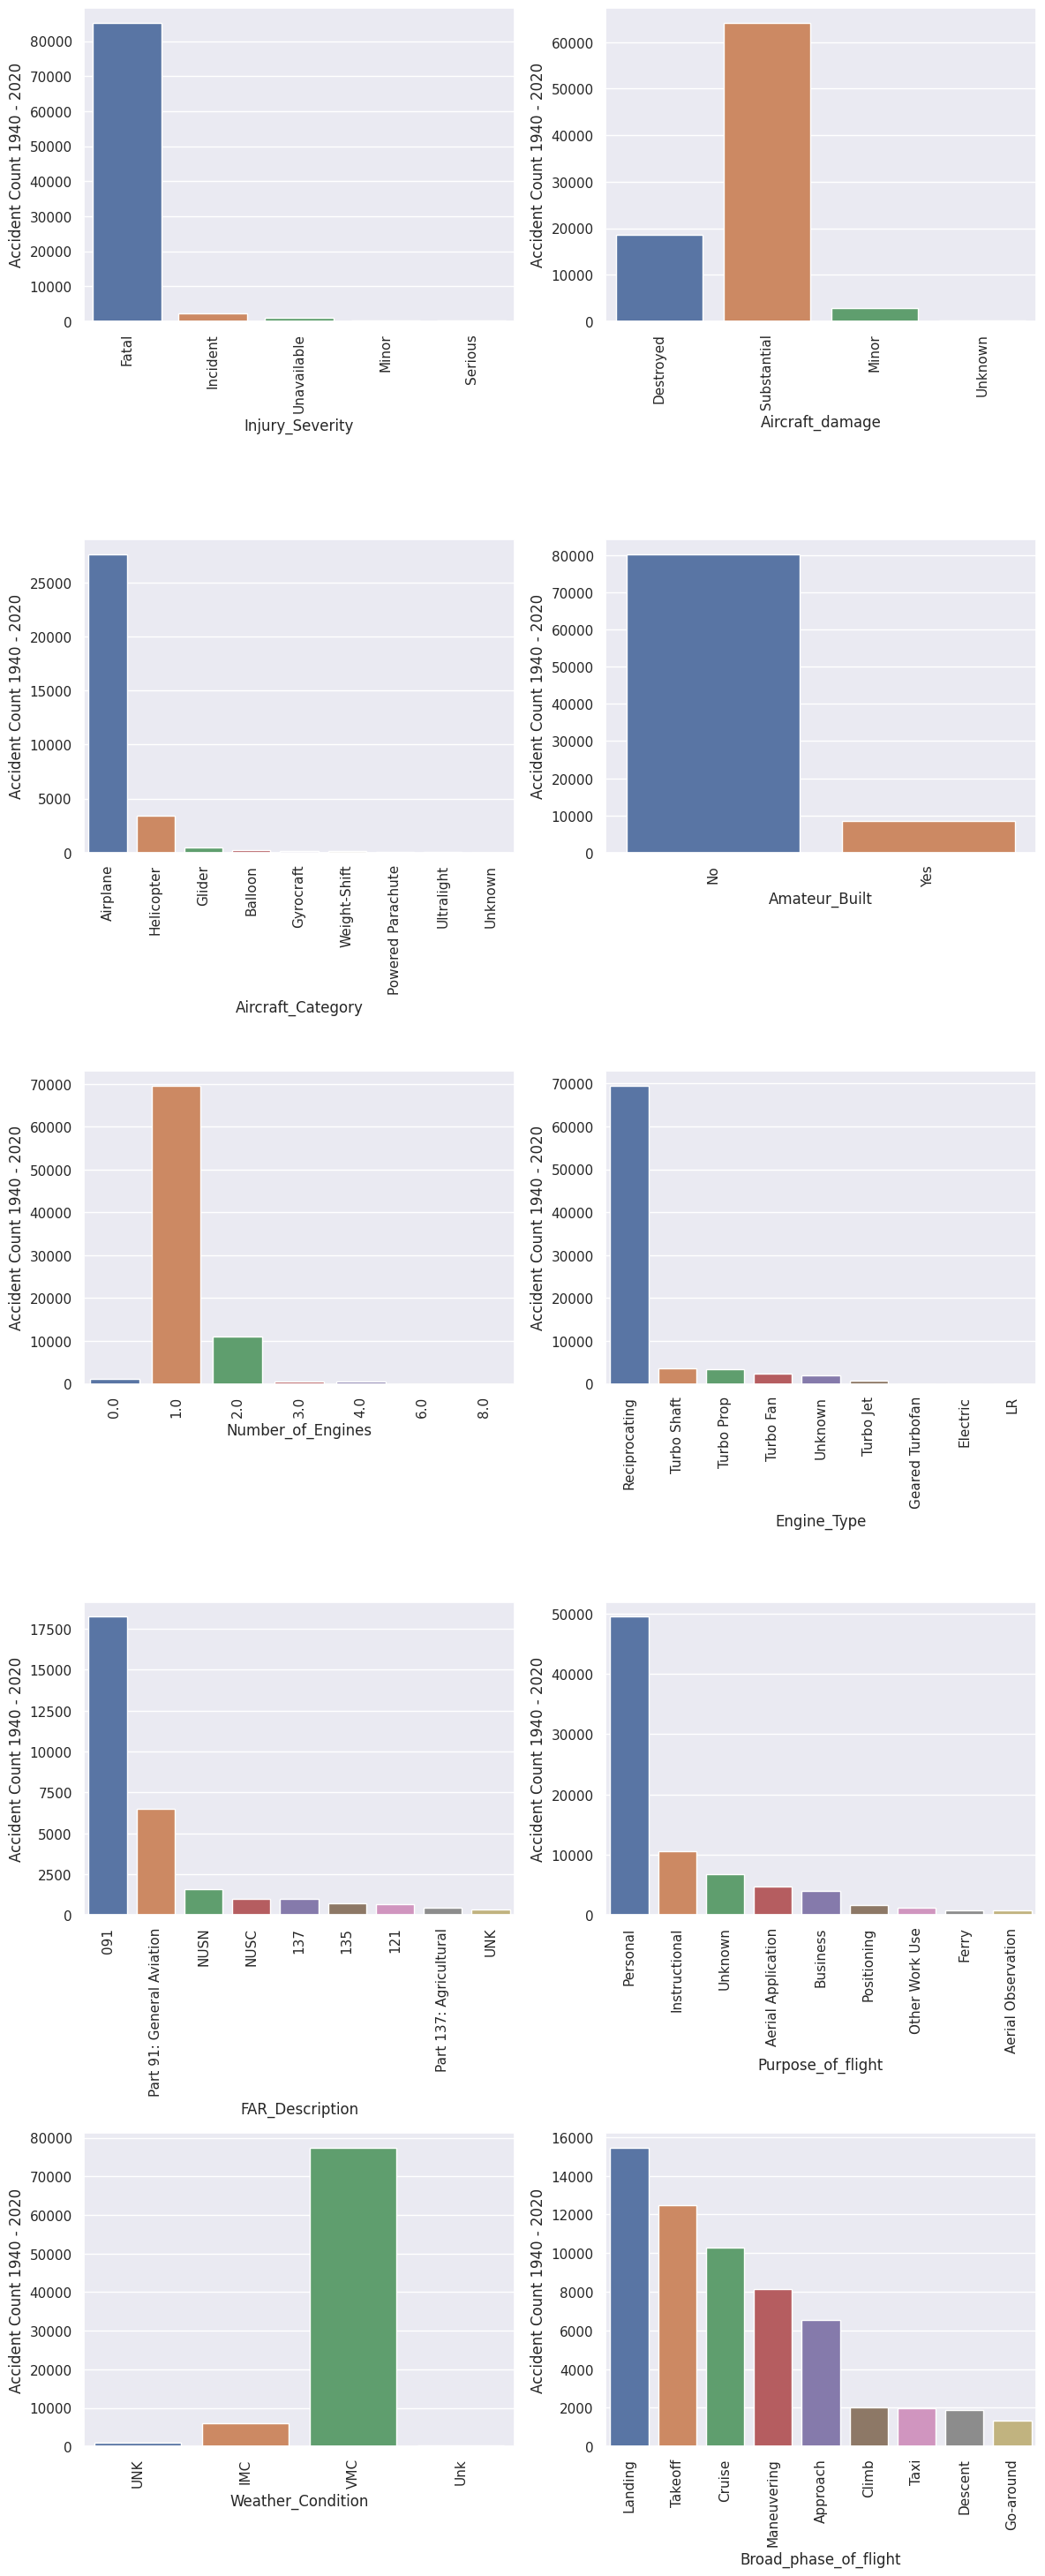

In [70]:
histo_features = ['Injury_Severity','Aircraft_damage','Aircraft_Category','Amateur_Built','Number_of_Engines','Engine_Type','FAR_Description','Purpose_of_flight','Weather_Condition','Broad_phase_of_flight']
histo_obj =[x  for x in histo_features if df[x].dtypes == 'object']
histo_num =[x  for x in histo_features if df[x].dtypes != 'object']


fig  = plt.figure(figsize = (12,34))
for x in  histo_features:
    fig.add_subplot(6,2, histo_features.index(x)+1)
    if len(df[x].value_counts()) >10:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df, 
                      order = df[x].value_counts()[0:9].index).set(xlabel= x, 
                                                                     ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
    else:
        sns.countplot(x = df[x].dropna(), 
                      data  =  df).set(xlabel= x, 
                                         ylabel = "Accident Count 1940 - 2020")
        plt.xticks(rotation=90)
        
plt.tight_layout()
plt.savefig('hist_bars.png', dpi=300, bbox_inches='tight')
plt.show()

Insights:

* High-Density Regions: The USA and Europe have a high concentration of incidents, likely reflecting their dense air traffic and aviation networks.
* Global Reach: Aircraft accidents occur worldwide, but there are regions with fewer incidents, potentially due to lower aviation activity or underreporting.
* Severity Patterns: Most of the accidents are Fatal incidents (green).

In [71]:
print(f"""Unqiue number of countries: \n {df["Country"].value_counts()}""")
print()

Unqiue number of countries: 
 Country
United States                       82248
Brazil                                374
Canada                                359
Mexico                                358
United Kingdom                        344
                                    ...  
Seychelles                              1
Palau                                   1
Libya                                   1
Saint Vincent and the Grenadines        1
Turks and Caicos Islands                1
Name: count, Length: 219, dtype: int64



### **Observation:** From the dataset and the visualization, we can see that the "United States or (US)" and Europe has the highest number of counts according to this dataset.

#### **Since I am charged with determining which aircraft are the lowest risk for the company to start this new business endeavor, I personally think some of the columns are irrelevant to determining this so discarding those columns and making a new subset of the dataset**

In [72]:
df.columns

Index(['Event_Id', 'Investigation_Type', 'Accident_Number', 'Event_Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport_Code',
       'Airport_Name', 'Injury_Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Registration_Number', 'Make', 'Model',
       'Amateur_Built', 'Number_of_Engines', 'Engine_Type', 'FAR_Description',
       'Schedule', 'Purpose_of_flight', 'Air_carrier', 'Total_Fatal_Injuries',
       'Total_Serious_Injuries', 'Total_Minor_Injuries', 'Total_Uninjured',
       'Weather_Condition', 'Broad_phase_of_flight', 'Report_Status',
       'Publication_Date', 'Event_Year'],
      dtype='object')

In [73]:
#Droping columns that are not required for answering our Data Analysis Goals

df = df.drop(['Publication_Date',       # The date is now irrelevant since counting all accident 
              'Accident_Number',        # This information is irrelevant for the same reason mentioned above
              'Airport_Code',           # This information is irrelevant for the same reason mentioned above
              'Airport_Name',           # This information is irrelevant for the same reason mentioned above
              'Schedule',               # This information is irrelevant for the same reason mentioned above
              'Report_Status',          # This information is irrelevant for the same reason mentioned above
              'Air_carrier',            # This information is irrelevant for the same reason mentioned above
              'FAR_Description',        # This information is irrelevant for the same reason mentioned above
              'Event_Id',               # This information is irrelevant for the same reason mentioned above
              'Registration_Number',    # This information is irrelevant for the same reason mentioned above
              'Broad_phase_of_flight',  # This information is irrelevant for the same reason mentioned above                
              'Country',                # This information is irrelevant for the same reason mentioned above
              'Latitude',               # This information is irrelevant for the same reason mentioned above
              'Longitude'],             # This information is irrelevant for the same reason mentioned above

               axis=1)

# Replacing NAN values with unknown for the following columns
df['Purpose_of_flight'].fillna(value = 'Unknown', inplace=True)
df['Engine_Type'].fillna(value = 'Unknown', inplace=True)
df['Engine_Type'] = df['Engine_Type'].map(lambda x: 'Unknown' if x == 'UNK' or x == 'None' or x == 'NONE' else x)
df['Aircraft_damage'].fillna(value = 'Unknown', inplace=True)

# Replacing NAN values with UNK for unknown weather information and standardizing text strings
df['Weather_Condition'].fillna(value = 'Unknown', inplace=True)
df['Weather_Condition'] = df['Weather_Condition'].map(lambda x: 'Unknown' if x == 'Unk' else x)

# Removing non-airplanes from the subset and all analysis will be addressed to "Airplanes" only
df = df[df['Aircraft_Category'] == 'Airplane']
df

<ipython-input-73-e12ab44863f5>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Purpose_of_flight'].fillna(value = 'Unknown', inplace=True)
<ipython-input-73-e12ab44863f5>:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

,Investigation_Type,Event_Date,Location,Injury_Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Number_of_Engines,Engine_Type,Purpose_of_flight,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather_Condition,Event_Year
5,Accident,1979-09-17,"BOSTON, MA",Fatal,Substantial,Airplane,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,Unknown,NaN,NaN,1.0,44.0,VMC,1979
7,Accident,1982-01-01,"PULLMAN, WA",Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,Accident,1982-01-01,"EAST HANOVER, NJ",Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
12,Accident,1982-01-02,"HOMER, LA",Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
13,Accident,1982-01-02,"HEARNE, TX",Fatal,Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,"Lewistown, MT",Fatal,Substantial,Airplane,Piper,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88873,Accident,2022-12-14,"San Juan, PR",Fatal,Substantial,Airplane,Cirrus design corp,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
88876,Accident,2022-12-15,"Wichita, KS",Fatal,Substantial,Airplane,Swearingen,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88877,Accident,2022-12-16,"Brooksville, FL",Minor,Substantial,Airplane,Cessna,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


In [74]:
#Renaming columns for ease of use
new_column_names = {'Injury_Severity':'Severity','Number_of_Engines':'Engines','Purpose_of_flight':'Purpose', 
                    'Total_Fatal_Injuries':'Fatal', 'Total_Serious_Injuries':'Serious', 'Total_Minor_Injuries':'Minor', 
                    'Total_Uninjured':'Uninjured', 'Weather_Condition':'Weather', 'Investigation_Type':'Investigation'}

df.rename(columns=new_column_names, inplace=True)
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Investigation,Event_Date,Location,Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Engines,Engine_Type,Purpose,Fatal,Serious,Minor,Uninjured,Weather,Event_Year
5,Accident,1979-09-17,"BOSTON, MA",Fatal,Substantial,Airplane,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,Unknown,NaN,NaN,1.0,44.0,VMC,1979
7,Accident,1982-01-01,"PULLMAN, WA",Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,Accident,1982-01-01,"EAST HANOVER, NJ",Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
12,Accident,1982-01-02,"HOMER, LA",Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
13,Accident,1982-01-02,"HEARNE, TX",Fatal,Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,"Lewistown, MT",Fatal,Substantial,Airplane,Piper,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88873,Accident,2022-12-14,"San Juan, PR",Fatal,Substantial,Airplane,Cirrus design corp,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
88876,Accident,2022-12-15,"Wichita, KS",Fatal,Substantial,Airplane,Swearingen,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88877,Accident,2022-12-16,"Brooksville, FL",Minor,Substantial,Airplane,Cessna,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


Text(0.5, 1.0, 'Variables with missing values')

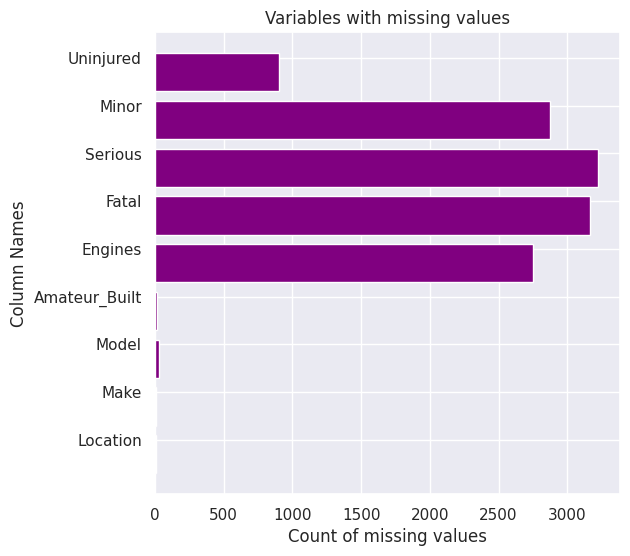

In [75]:
#Summing up all the missing values of all the columns in the new subset

new_null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

# Visualizing the null entries again in the new subset

labels = []
values = []
for col in new_null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

In [76]:
# #Droping nan from following two columns due to having negligible amount of NAN values

df = df.dropna(subset=['Make', 'Model'])
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Investigation,Event_Date,Location,Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Engines,Engine_Type,Purpose,Fatal,Serious,Minor,Uninjured,Weather,Event_Year
5,Accident,1979-09-17,"BOSTON, MA",Fatal,Substantial,Airplane,Mcdonnell douglas,DC9,No,2.0,Turbo Fan,Unknown,NaN,NaN,1.0,44.0,VMC,1979
7,Accident,1982-01-01,"PULLMAN, WA",Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,Accident,1982-01-01,"EAST HANOVER, NJ",Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
12,Accident,1982-01-02,"HOMER, LA",Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
13,Accident,1982-01-02,"HEARNE, TX",Fatal,Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,"Lewistown, MT",Fatal,Substantial,Airplane,Piper,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88873,Accident,2022-12-14,"San Juan, PR",Fatal,Substantial,Airplane,Cirrus design corp,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
88876,Accident,2022-12-15,"Wichita, KS",Fatal,Substantial,Airplane,Swearingen,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88877,Accident,2022-12-16,"Brooksville, FL",Minor,Substantial,Airplane,Cessna,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


Text(0.5, 1.0, 'Variables with missing values')

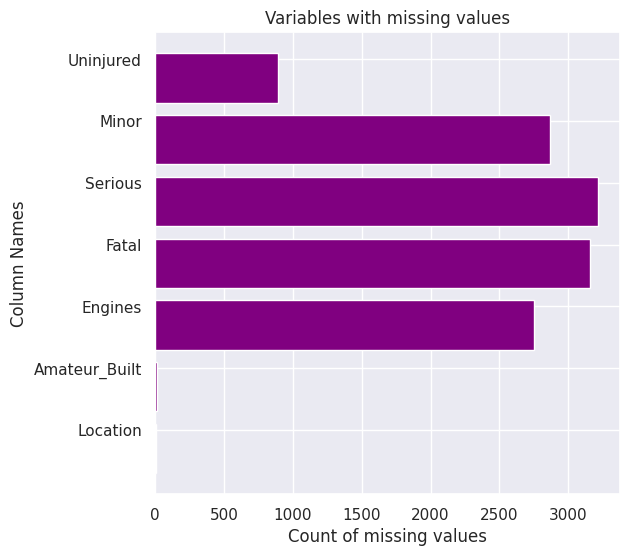

In [77]:
#Summing up all the missing values of all the columns in the new subset

new_null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

# Visualizing the null entries again in the new subset

labels = []
values = []
for col in new_null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

### Dealing with the NaN entries for the remaining columns

In order to do this it needs to determined what method we will use. Such as replacing with the mean, median, etc. Using data from the Fatality and Severity columns to update both columns.

Dealing with the **Fatal** column

In [78]:
#Introducing a new column to work with (Dummy column)
df['Fatality'] = df['Severity']

# Remaping the values in the newly introduced column based on the values of other columns
df['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True)

# Adds a number in 'Fatal' column for every 'Fatal' entry in 'Fatality' column and copies that into 'Fatality' Column
df['Fatality'] = df.apply(lambda row: row['Fatal'] if row['Fatality'] == 'Fatal' else row['Fatality'], axis=1)

#replaces 'Unavailable' with NaN for later conversion of the column to a number
df['Fatality'].replace('Unavailable', np.nan, inplace=True)

# Type conversion from NaN into an int of the values in any column that is not a NaN 
df['Fatality'][~df['Fatality'].isna()] = df['Fatality'][~df['Fatality'].isna()].astype(int)

# Replacing NaN with numbers from the Fatal column
df['Fatality'].fillna(df['Fatal'], inplace=True)

# Droping the remaining NaN values. [Insignificant data lost as sum of null values were only 20]
df.dropna(subset = ['Fatality'], inplace=True)

#Copy 'Fatality' column to 'Fatal' column
df['Fatal'] = df['Fatality'] 

# Since the purpose of the dummy column is now served, Dropping the 'Fatality' column
df = df.drop(['Fatality'],axis=1)

# Renaming the "Severity" column values to 'Fatal' and 'Non-Fatal'
df['Severity'] = df.apply(lambda x: 'Non-Fatal' if x['Fatal'] == 0 else 'Fatal', axis=1)

<ipython-input-78-c2b585a3b480>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fatality'] = df['Severity']
<ipython-input-78-c2b585a3b480>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fatality'].replace({'Non-Fatal': 0, 'Minor': 0, 'Serious': 0, 'Incident': 0}, inplace=True

In [79]:
df['Severity'].value_counts()

Severity
Non-Fatal    19396
Fatal         5150
Name: count, dtype: int64

In [80]:
# Seeing the remaining nan values
df.isna().sum()

Investigation           0
Event_Date              0
Location                5
Severity                0
Aircraft_damage         0
Aircraft_Category       0
Make                    0
Model                   0
Amateur_Built          14
Engines              2639
Engine_Type             0
Purpose                 0
Fatal                   0
Serious               381
Minor                 407
Uninjured             315
Weather                 0
Event_Year              0
dtype: int64

In [81]:
df.isnull().sum()

Investigation           0
Event_Date              0
Location                5
Severity                0
Aircraft_damage         0
Aircraft_Category       0
Make                    0
Model                   0
Amateur_Built          14
Engines              2639
Engine_Type             0
Purpose                 0
Fatal                   0
Serious               381
Minor                 407
Uninjured             315
Weather                 0
Event_Year              0
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

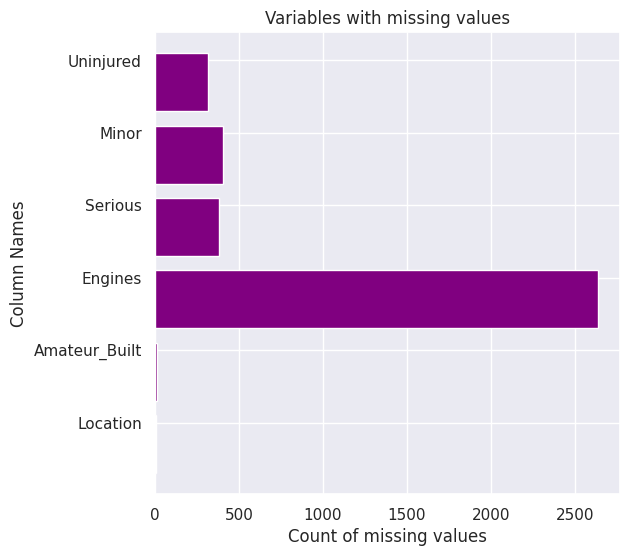

In [82]:
#Summing up all the missing values of all the columns in the new subset

new_null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

# Visualizing the null entries again in the new subset

labels = []
values = []
for col in new_null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

Creating barcharts to better visual data distribution for remaining columns to decide better on how to deal with the 'NAN' values.

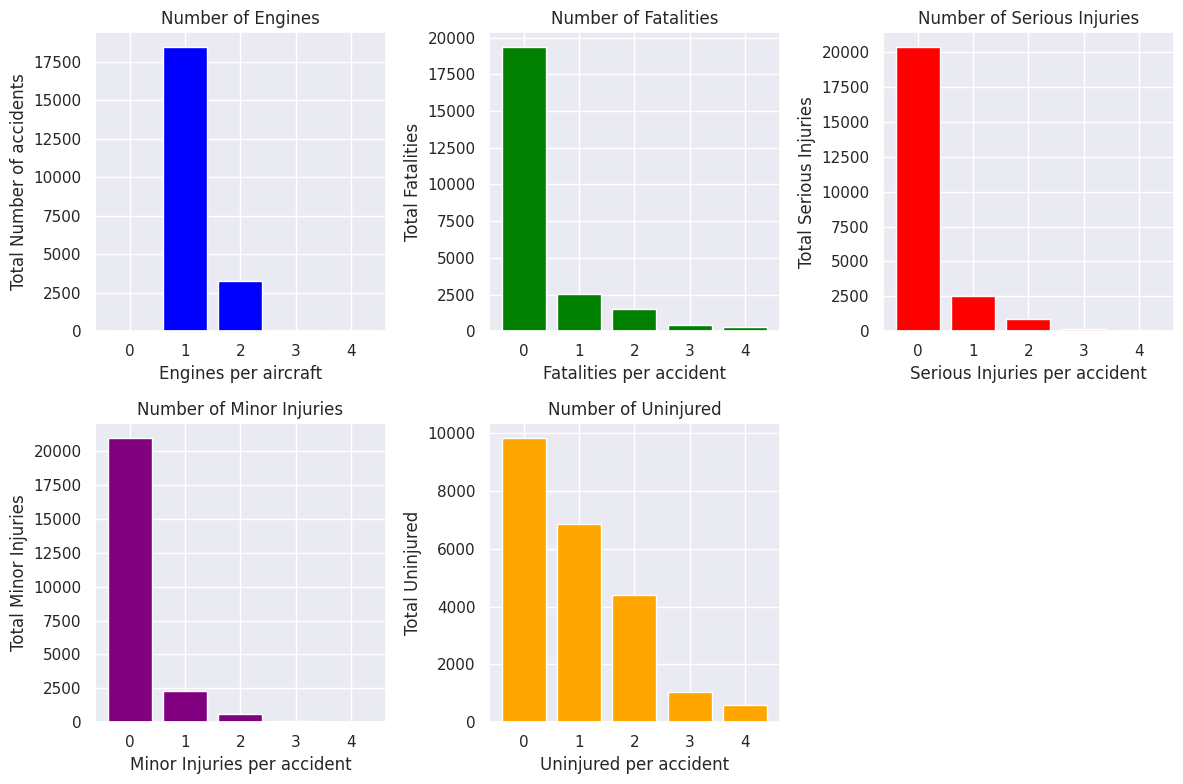

In [83]:
plt.figure(figsize=(12, 8))

# Engines
plt.subplot(2, 3, 1)
plt.bar(df['Engines'].value_counts().index[0:5], df['Engines'].value_counts().values[0:5], color='blue')
plt.title('Number of Engines')
plt.xlabel('Engines per aircraft')
plt.ylabel('Total Number of accidents')

# Fatalities
plt.subplot(2, 3, 2)
plt.bar(df['Fatal'].value_counts().index[0:5], df['Fatal'].value_counts().values[0:5], color='green')
plt.title('Number of Fatalities')
plt.xlabel('Fatalities per accident')
plt.ylabel('Total Fatalities')

# Serious
plt.subplot(2, 3, 3)
plt.bar(df['Serious'].value_counts().index[0:5], df['Serious'].value_counts().values[0:5], color='red')
plt.title('Number of Serious Injuries')
plt.xlabel('Serious Injuries per accident')
plt.ylabel('Total Serious Injuries')

# Minor
plt.subplot(2, 3, 4)
plt.bar(df['Minor'].value_counts().index[0:5], df['Minor'].value_counts().values[0:5], color='purple')
plt.title('Number of Minor Injuries')
plt.xlabel('Minor Injuries per accident')
plt.ylabel('Total Minor Injuries')

# Uninjured
plt.subplot(2, 3, 5)
plt.bar(df['Uninjured'].value_counts().index[0:5], df['Uninjured'].value_counts().values[0:5], color='orange')
plt.title('Number of Uninjured')
plt.xlabel('Uninjured per accident')
plt.ylabel('Total Uninjured')

plt.savefig('NAN mean.png', transparent=True, bbox_inches='tight')
plt.tight_layout() 
plt.show()

**Observation:** All figures are very positively skewed 

**Decision:** The following columns will be updated with the 'Median' as it won't change the data drastically

In [84]:
df['Engines'].fillna(value = df['Engines'].median(), inplace = True)
df['Serious'].fillna(value = df['Serious'].median(), inplace = True)
df['Minor'].fillna(value = df['Minor'].median(), inplace = True)
df['Uninjured'].fillna(value = df['Uninjured'].median(), inplace = True)
df

<ipython-input-84-cb47372ab01e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Engines'].fillna(value = df['Engines'].median(), inplace = True)
<ipython-input-84-cb47372ab01e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

,Investigation,Event_Date,Location,Severity,Aircraft_damage,Aircraft_Category,Make,Model,Amateur_Built,Engines,Engine_Type,Purpose,Fatal,Serious,Minor,Uninjured,Weather,Event_Year
7,Accident,1982-01-01,"PULLMAN, WA",Non-Fatal,Substantial,Airplane,Cessna,140,No,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,Accident,1982-01-01,"EAST HANOVER, NJ",Non-Fatal,Substantial,Airplane,Cessna,401B,No,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
12,Accident,1982-01-02,"HOMER, LA",Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,No,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
13,Accident,1982-01-02,"HEARNE, TX",Fatal,Destroyed,Airplane,Cessna,R172K,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
14,Accident,1982-01-02,"CHICKASHA, OK",Fatal,Destroyed,Airplane,Navion,A,No,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,"Lewistown, MT",Non-Fatal,Substantial,Airplane,Piper,PA42,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88873,Accident,2022-12-14,"San Juan, PR",Non-Fatal,Substantial,Airplane,Cirrus design corp,SR22,No,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
88876,Accident,2022-12-15,"Wichita, KS",Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,No,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88877,Accident,2022-12-16,"Brooksville, FL",Non-Fatal,Substantial,Airplane,Cessna,R172K,No,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


In [85]:
df.isna().sum()

Investigation         0
Event_Date            0
Location              5
Severity              0
Aircraft_damage       0
Aircraft_Category     0
Make                  0
Model                 0
Amateur_Built        14
Engines               0
Engine_Type           0
Purpose               0
Fatal                 0
Serious               0
Minor                 0
Uninjured             0
Weather               0
Event_Year            0
dtype: int64

Text(0.5, 1.0, 'Variables with missing values')

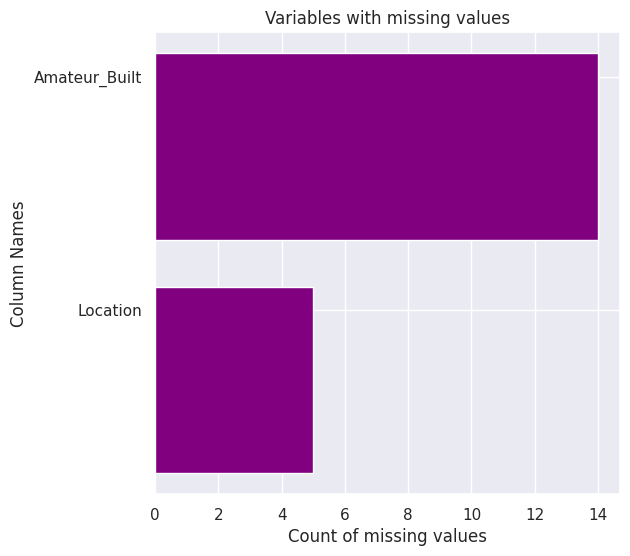

In [86]:
#Summing up all the missing values of all the columns in the new subset

new_null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

# Visualizing the null entries again in the new subset

labels = []
values = []
for col in new_null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

Since I have very few null entries left relative to the entire dataset, It's better to drop these few rows.

In [87]:
df = df.drop(columns=['Amateur_Built', 'Location'])
df

,Investigation,Event_Date,Severity,Aircraft_damage,Aircraft_Category,Make,Model,Engines,Engine_Type,Purpose,Fatal,Serious,Minor,Uninjured,Weather,Event_Year
7,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
8,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
12,Accident,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
13,Accident,1982-01-02,Fatal,Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
14,Accident,1982-01-02,Fatal,Destroyed,Airplane,Navion,A,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,Accident,2022-12-13,Non-Fatal,Substantial,Airplane,Piper,PA42,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88873,Accident,2022-12-14,Non-Fatal,Substantial,Airplane,Cirrus design corp,SR22,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
88876,Accident,2022-12-15,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
88877,Accident,2022-12-16,Non-Fatal,Substantial,Airplane,Cessna,R172K,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


Text(0.5, 1.0, 'Variables with missing values')

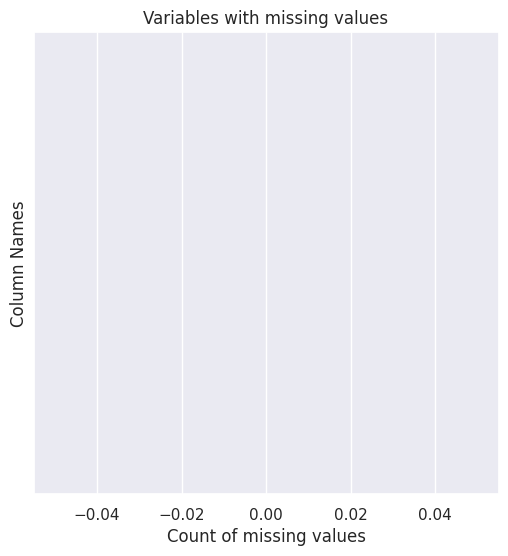

In [88]:
#Summing up all the missing values of all the columns in the new subset

new_null_columns = df.columns[df.isnull().any()]
df.isnull().sum()

# Visualizing the null entries again in the new subset

labels = []
values = []
for col in new_null_columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
ind = np.arange(len(labels))
width=0.6
fig, ax = plt.subplots(figsize=(6,6))
rects = ax.barh(ind, np.array(values), color='purple')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_ylabel("Column Names")
ax.set_title("Variables with missing values")

In [89]:
df.isna().sum()

Investigation        0
Event_Date           0
Severity             0
Aircraft_damage      0
Aircraft_Category    0
Make                 0
Model                0
Engines              0
Engine_Type          0
Purpose              0
Fatal                0
Serious              0
Minor                0
Uninjured            0
Weather              0
Event_Year           0
dtype: int64

In [90]:
#Saving the fixed non-null dataset upto this point (Safety measure)

df.to_csv("Aviation_Accident_Fixed_Database.csv", index = False)

In [91]:
#Loading the dataset again

df = pd.read_csv('/kaggle/working/Aviation_Accident_Fixed_Database.csv')
df

,Investigation,Event_Date,Severity,Aircraft_damage,Aircraft_Category,Make,Model,Engines,Engine_Type,Purpose,Fatal,Serious,Minor,Uninjured,Weather,Event_Year
0,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,140,1.0,Reciprocating,Personal,0.0,0.0,0.0,2.0,VMC,1982
1,Accident,1982-01-01,Non-Fatal,Substantial,Airplane,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC,1982
2,Accident,1982-01-02,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,1.0,Reciprocating,Personal,0.0,0.0,1.0,0.0,IMC,1982
3,Accident,1982-01-02,Fatal,Destroyed,Airplane,Cessna,R172K,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
4,Accident,1982-01-02,Fatal,Destroyed,Airplane,Navion,A,1.0,Reciprocating,Personal,1.0,0.0,0.0,0.0,IMC,1982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24541,Accident,2022-12-13,Non-Fatal,Substantial,Airplane,Piper,PA42,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
24542,Accident,2022-12-14,Non-Fatal,Substantial,Airplane,Cirrus design corp,SR22,1.0,Unknown,Personal,0.0,0.0,0.0,1.0,VMC,2022
24543,Accident,2022-12-15,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,2.0,Unknown,Unknown,0.0,0.0,0.0,1.0,Unknown,2022
24544,Accident,2022-12-16,Non-Fatal,Substantial,Airplane,Cessna,R172K,1.0,Unknown,Personal,0.0,1.0,0.0,0.0,VMC,2022


In [92]:
df.columns

Index(['Investigation', 'Event_Date', 'Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Make', 'Model', 'Engines', 'Engine_Type',
       'Purpose', 'Fatal', 'Serious', 'Minor', 'Uninjured', 'Weather',
       'Event_Year'],
      dtype='object')

### Visualizing the relationship between the columns

**Pairplot:** Visualizing pairwise relationships between the numerical injury-related columns such as "Fatal", "Serious", "Minor", and "Uninjured".

**Insights:**

1. Most values cluster near zero, indicating accidents with fewer injuries are common.
2. 

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

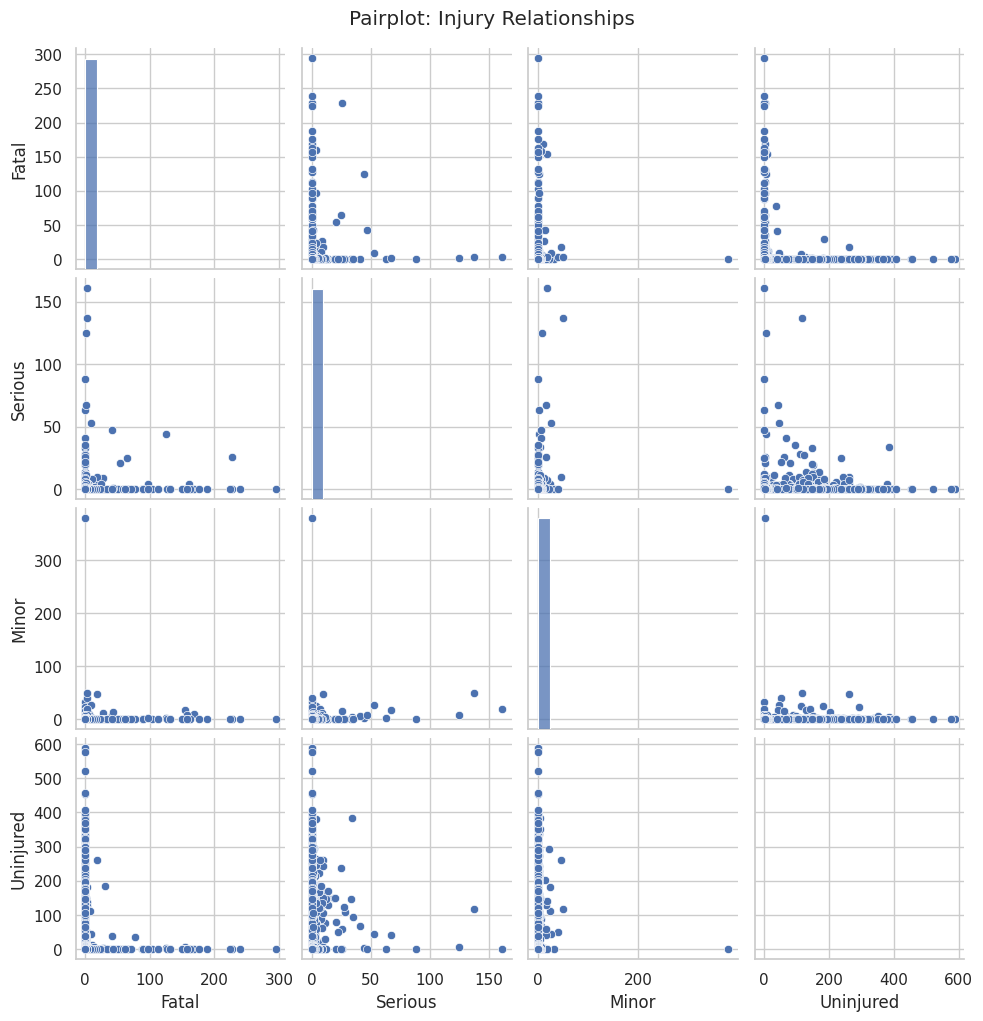

In [93]:
sns.set(style="whitegrid")
pairplot = sns.pairplot(df[['Fatal', 'Serious', 'Minor', 'Uninjured']])  # Without hue
plt.suptitle("Pairplot: Injury Relationships", y=1.02)
plt.show()


**Facet Grid:** Visualizing the distribution of Fatal injuries across Aircraft_Category and Severity.

**Insights:**

1. The count of fatalities varies between categories such as "Non-Fatal" and "Fatal" under different aircraft types.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


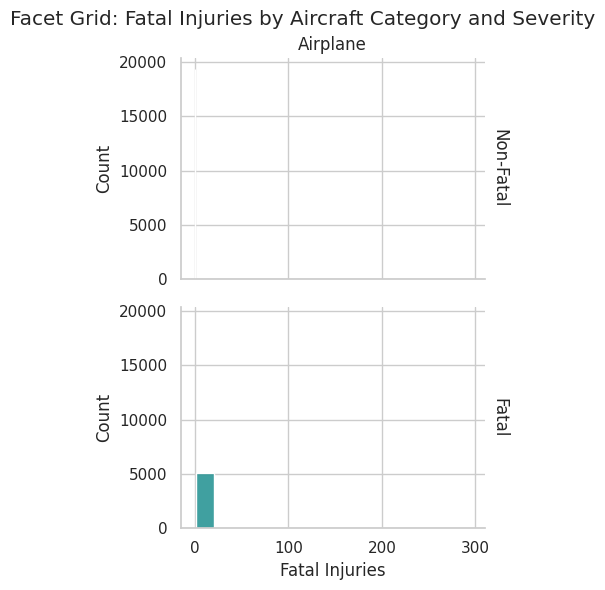

In [94]:
facet = sns.FacetGrid(df, col="Aircraft_Category", row="Severity", margin_titles=True, height=3, aspect=1.5)
facet.map(sns.histplot, "Fatal", kde=False, bins=15, color="teal")
facet.set_axis_labels("Fatal Injuries", "Count")
facet.set_titles(col_template="{col_name}", row_template="{row_name}")
facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle("Facet Grid: Fatal Injuries by Aircraft Category and Severity")
plt.show()


**Joint Plot:** Visualizing the relationship between Fatal and Serious injuries in aviation accidents with the data being further categorized by the weather condition.

**Insights:**

1. Most data points are clustered near the origin suggesting that most accidents involve fewer fatalities and serious injuries.
2. Few points with high Fatal or Serious counts indicate outlier events with severe consequences.
3. Different weather conditions are scattered across the plot, though VMC (good weather) appears more common as it has more points and which was also shown in the earlier countplot as well.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

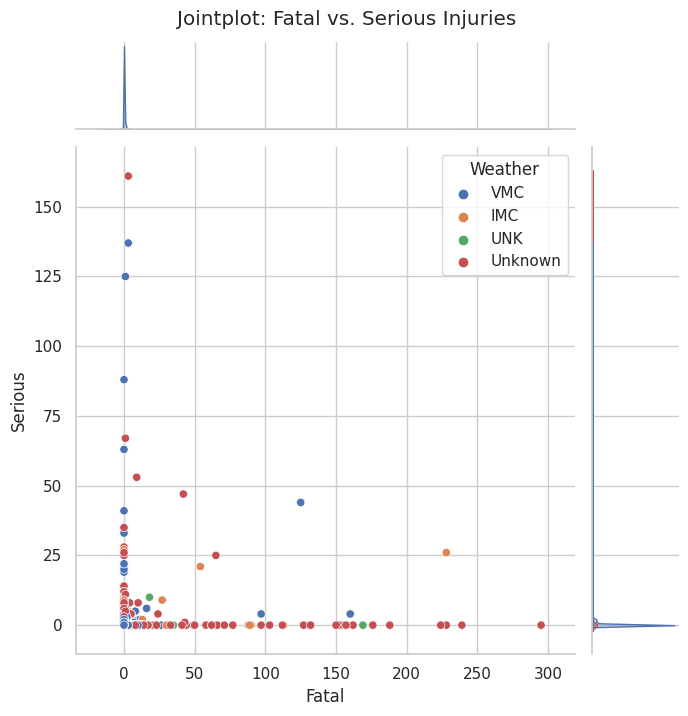

In [95]:
jointplot = sns.jointplot(
    data=df,
    x="Fatal",
    y="Serious",
    kind="scatter",
    hue="Weather",
    height=7,
    marginal_kws=dict(fill=True) 
)
jointplot.fig.suptitle("Jointplot: Fatal vs. Serious Injuries", y=1.02)
plt.show()


**Violin Plot:** Visualizing the distribution of Fatal injuries across different Weather conditions.

**Insights:**

1.  Across all weather conditions, most accidents result in very few fatalities, with density highest near zero.
2.  Each condition has some extreme cases (Outliers) with high fatality counts causing the long tails in the figure.
3.  No significant difference in fatality distributions between VMC and IMC conditions.

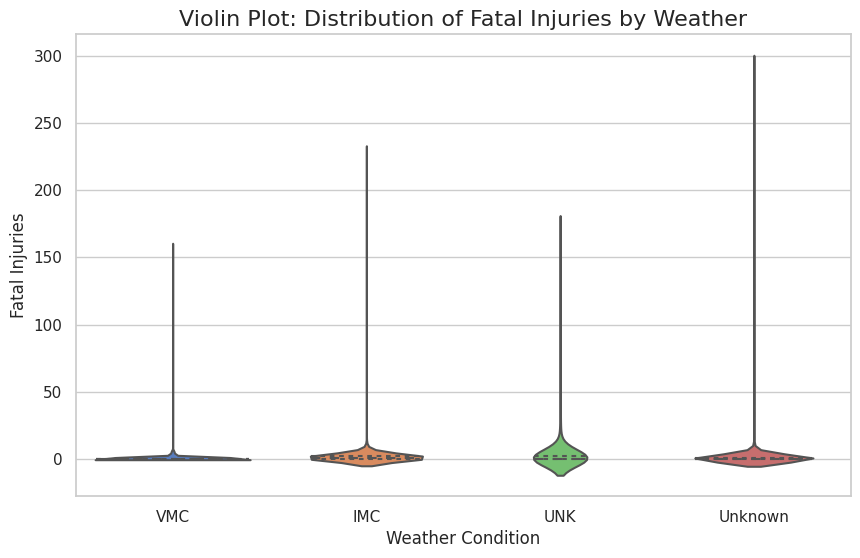

In [96]:
plt.figure(figsize=(10, 6))
violinplot = sns.violinplot(
    data=df, 
    x="Weather", 
    y="Fatal", 
    palette="muted", 
    inner="quartile"
)

# Set plot title and labels
plt.title("Violin Plot: Distribution of Fatal Injuries by Weather", fontsize=16)
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Fatal Injuries", fontsize=12)

# Show the plot
plt.show()

Reviewing purpose value count for flight categories to determine which flight types apply for risk assessment.

In [97]:
df['Purpose'].value_counts()

Purpose
Personal                     14189
Unknown                       4387
Instructional                 2727
Aerial Application             921
Business                       719
Positioning                    306
Flight Test                    208
Ferry                          167
Aerial Observation             159
Skydiving                      146
Executive/corporate            143
Other Work Use                 140
Banner Tow                      76
Air Race show                   74
Public Aircraft - Federal       52
Public Aircraft                 34
Glider Tow                      34
Public Aircraft - State         21
Firefighting                    16
Public Aircraft - Local         12
ASHO                             6
Air Drop                         3
PUBS                             3
Air Race/show                    2
External Load                    1
Name: count, dtype: int64

**Question 1:** What types of flights have the highest average fatalities?

Calculating the mean for fatalities for each purpose in the purpose column to get an idea of what type of business would have the most/least risk of fatalities.

In [98]:
mean_fatal_df = df.groupby('Purpose')['Fatal'].mean() # Calculate mean of 'Fatal' for each 'Purpose' category

mean_fatal_df = mean_fatal_df.reset_index() # Converting Series to DataFrame
mean_fatal_df.columns = ['Purpose', 'Mean Fatal']

mean_fatal_df['Mean Fatal'] = mean_fatal_df['Mean Fatal'].round(3) # Round 'Mean Fatal' to 2 decimal points

mean_fatal_df = mean_fatal_df.sort_values(by='Mean Fatal', ascending=False).reset_index(drop=True) # Sort DataFrame in descending order by 'Mean Fatal' and reset index

mean_fatal_df.head()

,Purpose,Mean Fatal
0,ASHO,2.333
1,Unknown,1.944
2,Skydiving,1.486
3,Public Aircraft,1.353
4,Ferry,1.180


In [99]:
# Droping purpose values that are not business related and plotting results. This will allow us to show what categories of business have the least fatalities associated with that business type.

# How many unique types of purposes do we have?
print(f"Total unique types of engine: {len(df.Purpose.unique())}")
print()

print(f"""Type wise purpose count: \n {df["Purpose"].value_counts()}""")
print()

Total unique types of engine: 25

Type wise purpose count: 
 Purpose
Personal                     14189
Unknown                       4387
Instructional                 2727
Aerial Application             921
Business                       719
Positioning                    306
Flight Test                    208
Ferry                          167
Aerial Observation             159
Skydiving                      146
Executive/corporate            143
Other Work Use                 140
Banner Tow                      76
Air Race show                   74
Public Aircraft - Federal       52
Public Aircraft                 34
Glider Tow                      34
Public Aircraft - State         21
Firefighting                    16
Public Aircraft - Local         12
ASHO                             6
Air Drop                         3
PUBS                             3
Air Race/show                    2
External Load                    1
Name: count, dtype: int64



#### Visualizing the categories of business that has the least fatalities associated with that business type

***1. Average Fatalities by Flight Type***

**Insights:** 

1. The categories such as skydiving, firefighting, and executive flights show the highest risk of fatalities, 
2. The categories such as instructional, banner tow, and aerial application activities demonstrate the least risk.

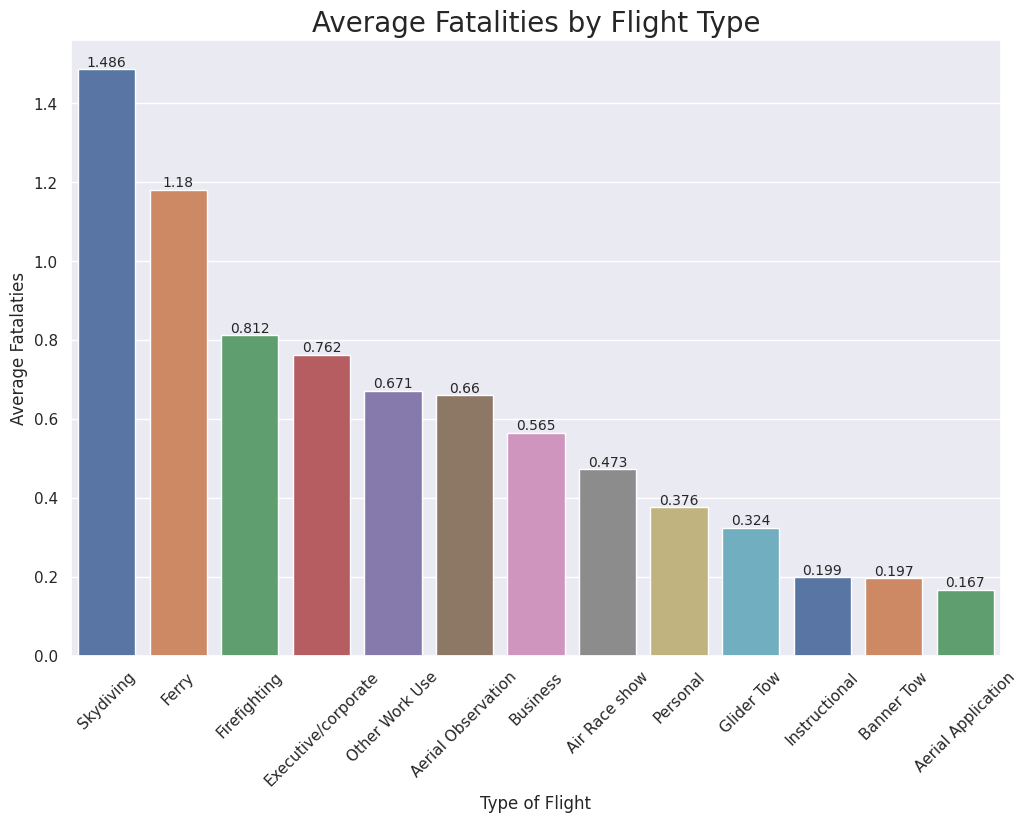

In [100]:
# List of purposes to drop
purposes_to_drop = ['Public Aircraft', 'External Load', 'PUBS', 'Air Drop', 'Public Aircraft - State', 
                    'Public Aircraft - Federal', 'Positioning', 'Air Race/show', 'Flight Test',  
                    'Public Aircraft - Local', 'Air Race show/Air Race/show', 'ASHO', 'Unknown']

# Creating a subset of the dataset without those values in the purpose column
mean_fatal_df_plot = mean_fatal_df[~mean_fatal_df['Purpose'].isin(purposes_to_drop)]

sns.set(style="darkgrid")
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Purpose', y='Mean Fatal', data=mean_fatal_df_plot, palette="deep")
bar_plot.set(xlabel='Type of Flight', ylabel='Average Fatalaties')
plt.title('Average Fatalities by Flight Type', fontsize=20)
plt.xticks(rotation=45)

for i, v in enumerate(mean_fatal_df_plot['Mean Fatal']):
    bar_plot.text(i, v, str(v), ha='center', va='bottom', fontsize=10)

plt.xticks(rotation=45)
plt.savefig(f'MeanFatalByFlightType.png', transparent=True, bbox_inches='tight')
plt.show()

In [101]:
df.columns

Index(['Investigation', 'Event_Date', 'Severity', 'Aircraft_damage',
       'Aircraft_Category', 'Make', 'Model', 'Engines', 'Engine_Type',
       'Purpose', 'Fatal', 'Serious', 'Minor', 'Uninjured', 'Weather',
       'Event_Year'],
      dtype='object')

***2. Count of Aircraft Damage by Purpose***

**Insights:** 

1. It seems that "Minor" damage is the most frequent across all flight purposes.
2. "Personal" flights have the highest overall count of damage, with a significant number of "Minor" and "Substantial" damages.
3. "Banner Tow", "Firefighting" and "Glider Tow" appear to have no minor damages.

/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


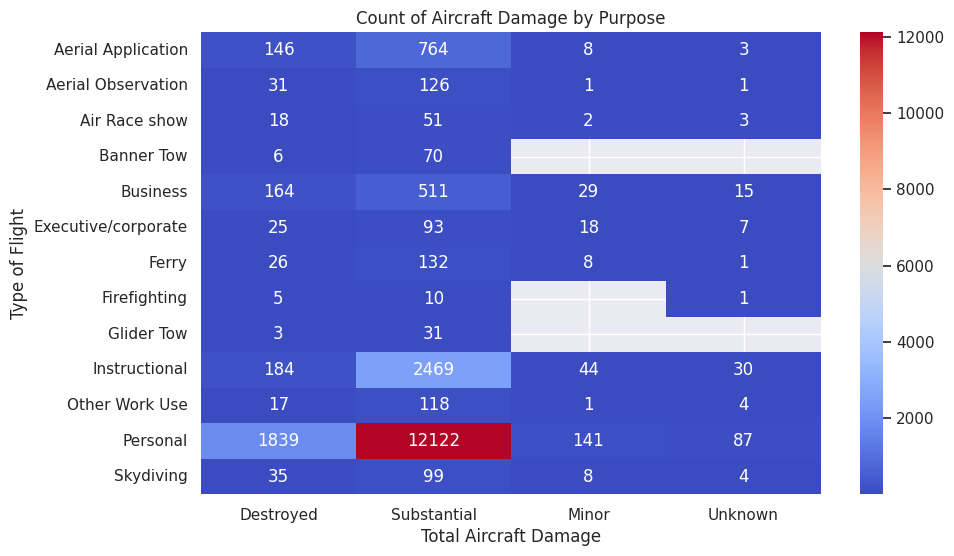

In [102]:
# Count the number of occurrences for each combination of 'Purpose' and 'Aircraft Damage'
damage_count_df = df.groupby(['Purpose', 'Aircraft_damage']).size().reset_index(name='Count')

# Drop the purposes
damage_count_df_plot = damage_count_df[~damage_count_df['Purpose'].isin(purposes_to_drop)]

# Pivot the DataFrame to prepare it for plotting
damage_count_pivot = damage_count_df_plot.pivot(index='Purpose', columns='Aircraft_damage', values='Count')

# Changing order for plot
damage_count_pivot = damage_count_pivot[['Destroyed', 'Substantial', 'Minor', 'Unknown']]

# Plot the data
plt.figure(figsize=(10, 6))
sns.heatmap(damage_count_pivot, annot=True, fmt=".0f", cmap='coolwarm')
plt.title('Count of Aircraft Damage by Purpose')
plt.xlabel('Total Aircraft Damage')
plt.ylabel('Type of Flight')

# Save the figure into a subfolder
plt.savefig(f'DamageByPurposeCount.png', transparent=True)
plt.show()

#### Visualizing the effect of weather on engines 

***1. Number of Engines for Each Weather Type***

**Insights:**

1. VMC (Visual Meteorological Conditions) has the highest number of aircraft with 1 engine, followed by IMC (Instrument Meteorological Conditions). (This was also visualized earlier as well)
2. Aircraft with 4 engines are relatively rare across all weather conditions suggesting aircrafts with more engines are less prone to accident.

In [103]:
# CHecking the count of each category of the Engines

engine_weather_df = df[df.Investigation == 'Accident']
engine_weather_df.Engines.value_counts()

Engines
1.0    20207
2.0     2613
4.0       48
3.0       24
0.0        3
8.0        1
6.0        1
Name: count, dtype: int64

In [104]:
# Droping rows with less then 10 entries. To little data for proper analysis.

engine_weather_df = engine_weather_df[(engine_weather_df['Engines'] > 0) & (engine_weather_df['Engines'] < 5)]
engine_weather_df.Engines.value_counts()

Engines
1.0    20207
2.0     2613
4.0       48
3.0       24
Name: count, dtype: int64

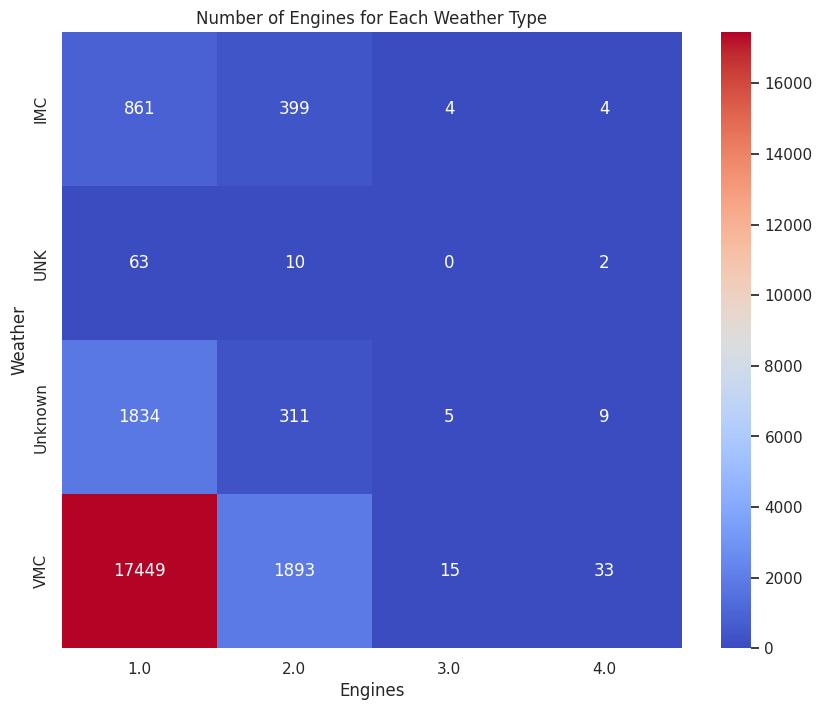

In [105]:
# Pivot the DataFrame
df_plot = engine_weather_df.pivot_table(index='Weather', columns='Engines', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(df_plot, annot=True, fmt='d', cmap='coolwarm')
plt.title('Number of Engines for Each Weather Type')
# Save the figure into a subfolder
plt.savefig(f'EnginesWeatherHeatMap.png', transparent=True)
plt.show()

# Making business recommendations 


#### Analysis 1: Determine which manufacturer planes are good for general business use based on damage and risk metrics

Here, I'm highlighting the manufacturer's accident counts, damage statistics, and an overall risk score to identify low-risk planes for potential purchase.

This analysis helps identify manufacturers with higher overall risk based on accident data and severity categories.

In [106]:
# Grouping and Aggregating Data
manufacturer_analysis_general = df.groupby('Make').agg(
    Total_Accidents=('Make', 'count'),  # Total number of accidents for each manufacturer
    Fatal_Accidents=('Fatal', 'sum'),  # Total number of fatal accidents
    Serious_Accidents=('Serious', 'sum'),  # Total number of serious accidents
    Minor_Accidents=('Minor', 'sum'),  # Total number of minor accidents
    Substantial_Damage=('Aircraft_damage', lambda x: (x == 'Substantial').sum()),  # Count of accidents causing substantial damage
    Destroyed_Damage=('Aircraft_damage', lambda x: (x == 'Destroyed').sum())  # Count of accidents leading to destroyed aircraft
).sort_values(by='Total_Accidents', ascending=False)  # Sort by total accidents in descending order

manufacturer_analysis_general

,Total_Accidents,Fatal_Accidents,Serious_Accidents,Minor_Accidents,Substantial_Damage,Destroyed_Damage
Make,,,,,,
Cessna,7322,3056.0,1767.0,1192.0,6071,997
Piper,4195,1898.0,941.0,722.0,3423,647
Beech,1555,1192.0,357.0,304.0,1157,323
Boeing,1248,3277.0,1273.0,786.0,274,53
Mooney,364,210.0,80.0,97.0,287,66
...,...,...,...,...,...,...
Grumman american avn. corp,1,1.0,0.0,0.0,0,1
Grumman american corporation,1,2.0,0.0,0.0,0,1
Guarino,1,0.0,2.0,0.0,1,0


Here, I'm introducing a new column "Risk_Score" by custom-creating a formula by assigning weights to different factors (weighted sum of fatal, serious, and damage cases) associated with aviation accidents and incidents.
factors associated with aviation accidents and incidents.

**Risk_Score = (3 * Fatal_Accidents) + (2 * Serious_Accidents) + (2 * Destroyed_Damage) + (Substantial_Damage)**


1. Fatal_Accidents = 3: Fatal accidents are the most severe outcome which results in loss of life. They represent the highest level of risk, both in terms of human cost and potential liability. Hence, a higher weight (3) is assigned.
2. Serious_Accidents = 2: Serious accidents can result in significant injuries or substantial costs to repair aircraft. While they are less severe than fatalities, they still have a high impact on safety records, public perception, and financial liability, thus giving a weight of 2.
3. Destroyed_Damage = 2: If an aircraft is completely destroyed, it signifies a total loss of the asset and possibly a catastrophic event. This is less severe than fatalities but worse than substantial damage, so a medium weight of 2 is given.
4. Substantial_Damage = 1: Substantial damage usually refers to damage that requires costly repairs but doesn't necessarily involve injuries or fatalities. It is still a concern but less critical than serious or fatal accidents, so it is assigned the lowest weight.


In [107]:
# Adding a Risk Score calculating by using a custom formula

manufacturer_analysis_general['Risk_Score'] = (
    manufacturer_analysis_general['Fatal_Accidents'] * 3 +
    manufacturer_analysis_general['Serious_Accidents'] * 2 +
    manufacturer_analysis_general['Destroyed_Damage'] * 2 +
    manufacturer_analysis_general['Substantial_Damage'] * 1 
)

# Sorting by Risk Score

manufacturer_analysis_general = manufacturer_analysis_general.sort_values(by='Risk_Score', ascending = False)

manufacturer_analysis_general

,Total_Accidents,Fatal_Accidents,Serious_Accidents,Minor_Accidents,Substantial_Damage,Destroyed_Damage,Risk_Score
Make,,,,,,,
Cessna,7322,3056.0,1767.0,1192.0,6071,997,20767.0
Boeing,1248,3277.0,1273.0,786.0,274,53,12757.0
Piper,4195,1898.0,941.0,722.0,3423,647,12293.0
Beech,1555,1192.0,357.0,304.0,1157,323,6093.0
Airbus,243,1316.0,183.0,69.0,24,12,4362.0
...,...,...,...,...,...,...,...
Reims aviation s.a.,1,0.0,0.0,0.0,0,0,0.0
Iniziative,1,0.0,0.0,0.0,0,0,0.0
Young robert herman,1,0.0,0.0,1.0,0,0,0.0


**Insights:**

1. Cessna has the highest number of accidents (7322), leading to the highest risk score (20767.0).
2. Boeing has a smaller number of accidents (1248) but ranks second due to higher severity (e.g., more fatal accidents).
3. Piper has fewer accidents than Boeing but a significant risk score due to the combined weight of fatal and serious accidents.


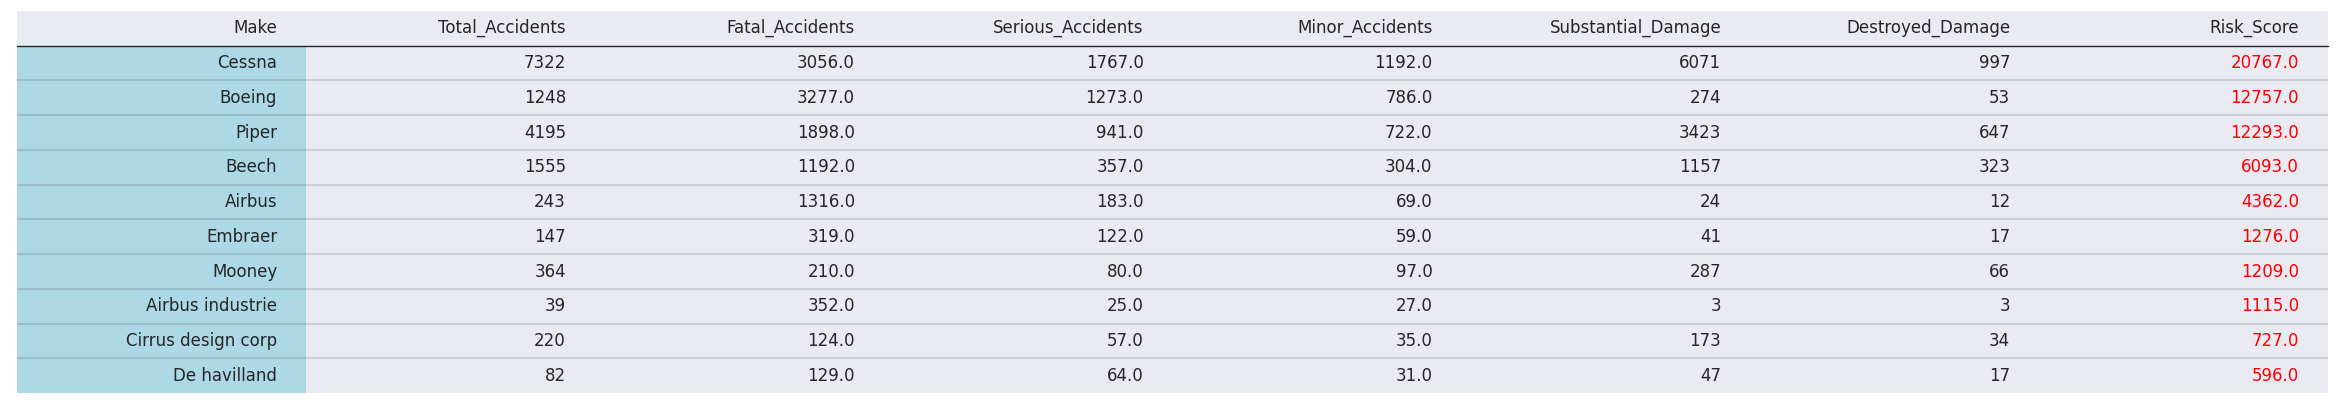

In [108]:
# Seeing the top 10 safest feature combinations to look for when investing

fig, ax = plt.subplots(figsize=(30, 5))
manufacturer_analysis_general['Risk_Score'] = manufacturer_analysis_general['Risk_Score'].round(3)
tab = Table(manufacturer_analysis_general.head(10))
tab.columns['Make'].set_facecolor("lightblue")
tab.columns['Risk_Score'].set_fontcolor("red")
# plt.savefig('Top10.png', transparent=True)
plt.show()

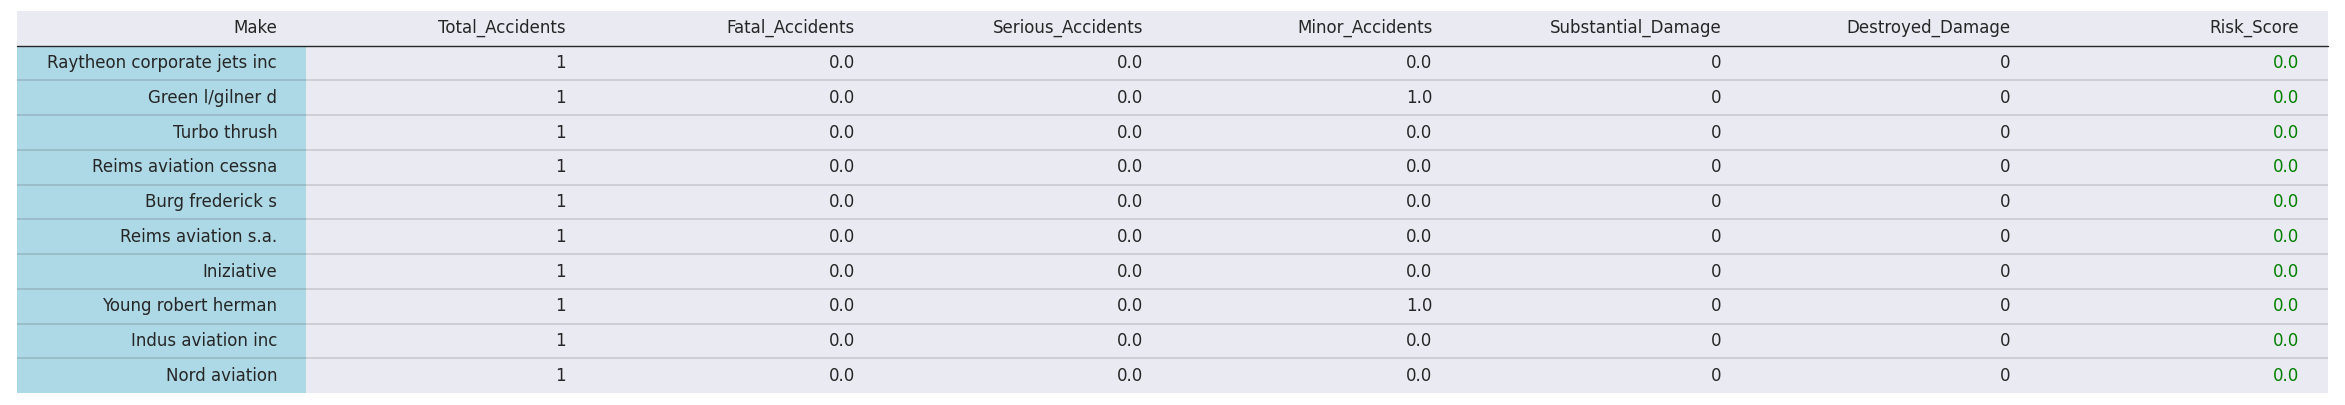

In [109]:
# Seeing the top 10 safest feature combinations to look for when investing

fig, ax = plt.subplots(figsize=(30, 5))
manufacturer_analysis_general['Risk_Score'] = manufacturer_analysis_general['Risk_Score'].round(3)
tab = Table(manufacturer_analysis_general.tail(10))
tab.columns['Make'].set_facecolor("lightblue")
tab.columns['Risk_Score'].set_fontcolor("green")
# plt.savefig('Bottom10.png', transparent=True)
plt.show()

#### Analysis 2: Percentage of damage types (Substantial and Destroyed) by engine configuration

Here, I'm calculating the percentage of damage types ("Substantial" and "Destroyed") by engine configuration and summarizing accident statistics.

This analysis provides insights into which configurations are associated with higher risks of substantial or complete destruction during accidents.

In [110]:
#Grouping and Aggregating Data by Engine Configuration

damage_by_engines_general = df.groupby('Engines').agg(
    Total_Accidents=('Engines', 'count'),  # Count of total accidents for each engine configuration.
    Substantial_Damage=('Aircraft_damage', lambda x: (x == 'Substantial').sum()),  # Count of accidents causing substantial damage.
    Destroyed_Damage=('Aircraft_damage', lambda x: (x == 'Destroyed').sum())  # Count of accidents leading to destroyed aircraft.
)

# Calculating Percentages
damage_by_engines_general['Substantial_Percentage'] = (
    damage_by_engines_general['Substantial_Damage'] / damage_by_engines_general['Total_Accidents'] * 100
)

damage_by_engines_general['Destroyed_Percentage'] = (
    damage_by_engines_general['Destroyed_Damage'] / damage_by_engines_general['Total_Accidents'] * 100
)


damage_by_engines_general

,Total_Accidents,Substantial_Damage,Destroyed_Damage,Substantial_Percentage,Destroyed_Percentage
Engines,,,,,
0.0,4,2,1,50.000000,25.000000
1.0,21121,17003,2851,80.502817,13.498414
2.0,3268,1789,552,54.742962,16.891065
3.0,52,17,3,32.692308,5.769231
4.0,99,26,10,26.262626,10.101010
6.0,1,1,0,100.000000,0.000000
8.0,1,1,0,100.000000,0.000000


**Insights:**

1. Aircraft with 1 engine have the highest total accidents (21,211) and a relatively high substantial damage percentage (~80.5%).
2. Aircraft with 2 engines show a slightly lower substantial percentage (54.7%) and destroyed percentage (16.89%) compared to single-engine planes.
3. Aircraft with 0 engines ( gliders) have small data (4 accidents), with a substantial damage percentage of 50% and destroyed percentage of 25%.
4. Aircraft with 8 engines (rare cases) show 100% substantial damage, but this is likely due to an extremely small sample size.

# Conclusion

1. The analysis highlights that skydiving, firefighting, and executive flights carry the highest risk of fatalities, whereas activities like instructional flying, banner towing, and aerial applications pose the lowest risk.
2. The findings suggest that single-engine aircraft may offer better survival prospects in adverse weather conditions.
3. The extensive dataset for single-engine aircraft likely enhances the precision of the results.
4. Implementing a severity rating system proved to be an effective way to simplify and quantify the data.
5. Combining data from earlier objectives provided significant and actionable insights.

## Based on this analysis, we have developed recommendations for 10 specific Make and Model combinations, tailored to their respective business applications.